# Chapter 5: Enzyme Kinetics
We now study common reaction mechanisms that describe enzyme catalysis. Enzymes can dramatically accelerate the rate of biochemical reactions inside and outside living cells. The absolute rates of biochemical reactions are key biological design variables because they can evolve from a very low rate as determined by the mass action kinetics based on collision frequencies, to a very high and specific reaction rate as determined by appropriately-evolved enzyme properties. We first describe the procedure used to derive enzymatic rate laws, which we then apply to the Michaelis-Menten reaction mechanism, then to the Hill model, and finally to the symmetry model. The first is used to describe plain chemical transformations, while the latter two are used to describe regulatory effects. 

**MASSpy** will be used to demonstrate some of the topics in this chapter.  

In [1]:
from mass import (
    MassModel, MassMetabolite, MassReaction, Simulation, MassSolution)
from mass.visualization import plot_time_profile, plot_phase_portrait

Other useful packages are also imported at this time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## 5.1 Enzyme Catalysis
Enzymes are catalysts that accelerate biochemical transformations in cells. Almost all enzymes are proteins. There are also catalytically active ribonucleic acids, called "ribozymes." The fundamental properties of enzyme catalysis are described in this section. 

### Enzymatic activity
The activity of an enzyme is measured by determining the increase in the reaction rate relative to the absence of the enzyme. In other words we compare the reaction rate of the un-catalyzed reaction to the catalyzed rate. The ratio can be thought of as an acceleration factor and this number can be quite high, sometimes by many million-fold. 

### Reaction and substrate specificity
Enzymes are usually very specific both with respect to the type of reaction being catalyzed (reaction specificity) and with respect to the reactants (the "substrates") that they act on. Highly specific enzymes catalyze the cleavage of only one type of a chemical bond, and only in one substrate. Other enzymes may have a narrow reaction specificity, but broad substrate specificity, i.e., they act on a number of chemically similar substrates. Rare enzymes exist that have both low reaction specificity and low substrate specificity. 

![Figure-5-1](./images/Ch5/Figure-5-1.png)

*__Figure 5.1:__ Basic principles of enzyme catalysis. From (Koolman, 2005).*

### Enzyme catalysis
As discussed in Chapter 2 (Figure 2.4), two molecules can only react with each other if they collide in a favorable orientation. Such collisions may be rare, and thus the reaction rate is slow. An un-catalyzed reaction starts with a favorable collision as shown in Figure 5.1a. Before the products are formed, the collision complex A-B has to pass through what is called a _transition state_. Its formation requires _activation energy_. Since activation energies can be quite high, only a few A-B complexes have this amount of energy, and thus a productive transition state arises only for a fraction of favorable collisions. As a result, conversion only happens occasionally even when the reaction is thermodynamically feasible; i.e., when the net change in Gibbs free energy is negative (\\(\Delta G < 0\\)). 

Enzymes can facilitate the probability of a favorable collision and lower the activation energy barrier, see Figure 5.1b,c. Enzymes are able to bind their substrates in the catalytic site. As a result, the substrates are favorably oriented relative to one another, greatly enhancing the probability that productive A-B complexes form. The transition state is stabilized leading to a lowered activation energy barrier. 

### Information on enzymes  
Detailed information is available on a large number of enzymes. This include structural information, the organism source, and other characteristics. An example is shown in Figure 5.2. Many online sources of such information exist. 

![Figure-5-2](./images/Ch5/Figure-5-2.png)

*__Figure 5.2:__ Detailed information on enzymes is available. From PDB.*

## 5.2 Deriving Enzymatic Rate Laws
The chemical events underlying the catalytic activities of enzymes are described by a reaction mechanism.  A reaction mechanism is comprised of the underlying elementary reactions that are believed to take place. A rate law is then formulated to describe the rate of reaction. 

A rate law describes the conversion of a substrate \\((x_1)\\) by an enzyme into a product \\((x_2)\\): 

$$\begin{equation} x_1 \stackrel{v}{\rightarrow} x_2 \tag{5.1} \end{equation}$$

where \\(v\\) is a function of the concentrations of the chemical species involved in the reaction. The steps involved in the development and analysis of enzymatic rate laws are illustrated in Figure 5.3 and they are as follows: 

![Figure-5-3](./images/Ch5/Figure-5-3.png)

*__Figure 5.3:__ The process of formulating enzymatic rate laws. QSSA represents the quasi-steady state assumption and QEA represents the quasi-equilibrium assumption.*

* Formulate the dynamic mass balances based on the elementary reactions in the postulated reaction mechanism, 

* Identify time invariants, or conservation relationships, 

* Reduce the dynamic dimension of the reaction mechanism by eliminating dynamically dependent variables using the conservation relationships, 

* Apply commonly used simplifying kinetic assumptions to formulate a rate law, representing a reduction in the dynamic dimension of the kinetic model, 

* Apply mathematical and numerical analysis to determine when the simplifying assumptions are valid and the reaction rate law can be used; and 

* Identify key dimensionless parameter ratios. This last step is optional and used by those interested in deeper mathematical analysis of the properties of the rate laws. 

The use of enzymatic rate laws in dynamic network models is hampered by their applicability in vivo based on in vitro measurements. From a practical standpoint, with the numerical simulation capacity that is now routinely available, applying simplifying assumptions may no longer be needed for computational simplification and convenience. However, it is useful to help understand the historical origin of enzymatic rate laws, the simplifications on which they are based, and when it may be desirable to use them. 

## 5.3 Michaelis-Menten Kinetics
The simplest enzymatic reaction mechanism, first proposed by Henri (Henri, 1903) but named after Michaelis and Menten (Michaelis, 1913) is; 

$$\begin{equation} S + E \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} X \stackrel{k_2}{\rightarrow} E + P \tag{5.2} \end{equation}$$

where a substrate, \\(S\\), binds reversibly to the enzyme, \\(E\\), to form the intermediate, \\(X\\), which can break down to give the product, $P$, and regenerate the enzyme. Note that it is similar to the reaction mechanism of two connected reversible bi-linear reactions (Eq. (4.38)) with $x_5 = x_2$, as one of the original reactants \\((E)\\) is regained in the second step. Historically speaking, the Michaelis-Menten scheme is the most important enzymatic reaction mechanism. A detailed account of the early history of Michaelis-Menten kinetics is found in (Segal, 1959).

### Step 1: Dynamic mass balances
Applying the law of mass action to the Michaelis-Menten reaction mechanism, one obtains four differential equations that describe the dynamics of the concentrations of the four chemical species involved in the reaction mechanism: 

$$\begin{align} \frac{ds}{dt} &= -k_1es + k_{-1}x, & s(t = 0) = s_0 \\ \frac{dx}{dt} &= k_1es - (k_{-1} + k_2)x, & x(t = 0) = 0 \\ \frac{de}{dt} &= -k_1es + (k_{-1} + k_2)x, & e(t = 0) = e_0 \\ \frac{dp}{dt} &= k_2x, & p(t = 0) = 0 \\ \end{align} \tag{5.3}$$

where the lower case letters denote the concentrations of the corresponding chemical species. The initial conditions shown are for typical initial rate experiments where substrate and free enzyme are mixed together at time \\(t=0\\). \\(e_0\\) and \\(s_0\\) denote the initial concentration of enzyme and substrate, respectively. No mass exchange occurs with the environment. 

### Step 2: Finding the time invariants
Using \\(\textbf{x} = (s, e, x, p)\\) and \\(\textbf{v} = (k_1es, \ k_{-1}x, \  k_2x)\\) the stoichiometrix matrix is 

$$\begin{equation} \textbf{S} = \begin{pmatrix} {-1} & {1} & {0} \\ {-1} & {1} & {1} \\ {1} & {-1} & {-1} \\ {0} & {0} & {1} \\ \end{pmatrix} \tag{5.4} \end{equation}$$

It has a rank of 2 and thus there are two conservation quantities. They are the total concentration of the enzyme and total concentration of the substrate: 

$$\begin{align} e_0 & = e + x \tag{5.5} \\ s_0 &= s + x  + p \tag{5.6} \end{align}$$

### Step 3: Reducing the dynamic description
As a consequence of the two conservation relationships, only two of equations 5.3 are dynamically independent. Choosing the substrate, \\(s\\), and the intermediate complex, \\(x\\), concentrations as the two independent variables, the reaction dynamics are described by: 

$$\begin{align} \frac{ds}{dt} &= -k_1e_0s + (k_1s + k_{-1})x, \ &s(t = 0)=s_0 \tag{5.7} \\ \frac{dx}{dt} &= k_1e_0s - (k_1s + k_{-1} + k_2)x, \ &x(t = 0)=0 \tag{5.8} \\ \end{align}$$

The major problem with this mass action kinetic model is that it is mathematically intractable (Hommes, 1962). Equations 5.7 and 5.8 can be reduced to an Abel type differential equation whose solution cannot be obtained in a closed form.

### Step 4: Applying kinetic assumptions
A closed form analytical solution to the mass action kinetic equations, 5.7 and 5.8, is only attainable by using simplifying kinetic assumptions. Two assumptions are used: the _quasi-steady state assumption_ (QSSA) and the _quasi-equilibrium assumption_ (QEA). 

#### The quasi-steady state assumption:
The rationale behind the quasi-steady state assumption (Briggs, 1925) is that, after a rapid transient phase, the intermediate, \\(X\\), reaches a quasi-stationary state in which its concentration does not change appreciably with time. Applying this assumption to Eq. (5.8) (i.e., \\(dx/dt=0\\)) gives the concentration of the intermediate complex as: 

$$\begin{equation} x_{qss} = \frac{e_0s}{K_m + s} \tag{5.9} \end{equation}$$

where $K_m = (k_{-1} + k_2)/k_1$ is the well-known Michaelis constant. Substituting $x_{qss}$ into the differential equation for the substrate (Eq. (5.7)) gives the rate law 

$$\begin{equation} \frac{ds}{dt} = \frac{-k_2e_0s}{K_m + s} \tag{5.10} \end{equation}$$

which is the well-known Michaelis-Menten equation, where \\(v_m\\) is the maximum reaction rate (or reaction velocity). 

Initially, the quasi-steady state assumption was justified based on physical intuition, but justification for its applicability is actually found within the theory of singular perturbations (Bowen, 1963) Eq. (5.10) can be shown to be the first term in an asymptotic series solution derived from singular perturbation theory (Heineken,1967), (Meiske, 1978); see review in (Palsson, 1984). 

#### The quasi-equilibrium assumption:
Here, one assumes that the binding step quickly reaches a quasi-equilibrium state (Henri, 1903), (Michaelis, 1913) where 

$$\begin{equation} \frac{se}{x} = \frac{s(e_0 - x)}{x} = \frac{k_{-1}}{k_1} = K_d, \ \text{or} \ x_{qe} = \frac{e_0s}{K_d + s} \tag{5.11} \end{equation}$$

holds. \\(K_d\\) is the disassociation equilibrium constant. Note the similarity to Eq. (5.9). Hence, one obtains the rate law 

$$\begin{equation} \frac{dp}{dt} = \frac{k_2e_0s}{K_d + s} \tag{5.12} \end{equation}$$

by using Eq. (5.11) in the differential equation for the product \\(P\\). 

### Step 5: Numerical solutions
The full dynamic description of the kinetics of the reaction (Eq. (5.7) and (5.8)) can be obtained by direct numerical integration. The results are most conveniently shown on a phase portrait along with the transient response of the concentrations on both the fast and slow time scales, see Figure 5.4. 

##### QSSA Solution

In [3]:
t0 = 0
tf = 1e3
# QSSA Assumption
# Define function to integrate
def qssa(t, s, *params):
    k2, e0, Km = params
    dsdt = (-k2*e0*s)/(Km + s)
    return dsdt

# Define initial conditions and parameters for integration
s0 = 1

e0 = (1/100)
k2 = 1
Km = 1
params = [k2, e0, Km]

# Obtain numerical solutions
sol_obj = solve_ivp(fun=lambda t, s: qssa(t, s, *params),
                    t_span=(t0, tf), y0=[s0])
t, s_sol = (sol_obj.t, sol_obj.y)
x_sol = np.array([(e0 * val)/(Km + val) for val in s_sol])
# Store solutions into Solution Objects
qssa_sol = MassSolution(
    "QSSA", solution_type="Conc", 
    data_dict={"s": s_sol[0], "x": x_sol[0]},
    time=t, interpolate=False)

##### Numerical Solution

In [4]:
model = MassModel('Michaeli_Menten')
## Define metabolites
s = MassMetabolite("s")
e = MassMetabolite("e")
x = MassMetabolite("x")
p = MassMetabolite("p")
# Define reactions
v1 = MassReaction("v1")
v2 = MassReaction("v2", reversible=False)
v1.add_metabolites({s: -1, e: -1, x: 1})
v2.add_metabolites({x: -1, e: 1, p: 1})
model.add_reactions([v1, v2])
## Define parameters
v1.kf = 2
v1.Keq = 2
v2.kf = 1
# Define initial conditions
model.update_initial_conditions({s: s0, e: e0, x: 0, p: 0})

# Solve
MM_simulation = Simulation(model, verbose=True, variable_step_size=True)
MM_simulation.variable_step_size = True
conc_sol, flux_sol = MM_simulation.simulate(model, (t0, tf))

Successfully loaded MassModel 'Michaeli_Menten' into RoadRunner.


##### Comparison of solutions

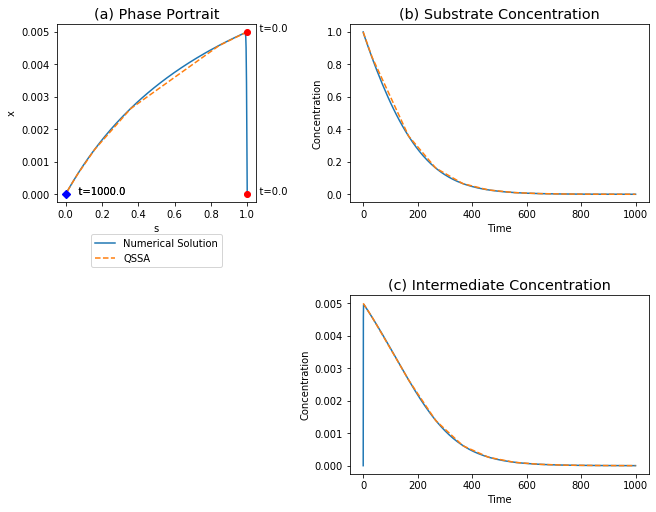

In [5]:
fig_5_4 = plt.figure(constrained_layout=True, figsize=(9, 7))
gs = fig_5_4.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1.5],
                          height_ratios=[1, 1])

ax1 = fig_5_4.add_subplot(gs[0, 0])
ax2 = fig_5_4.add_subplot(gs[0, 1])
ax3 = fig_5_4.add_subplot(gs[1, 1])
# Phase portrait of both solutions' substrate vs. intermediate
plot_phase_portrait(
    conc_sol, x=s, y=x, ax=ax1, legend=["Numerical Solution"],
    annotate_time_points="endpoints",
    annotate_time_points_color=["r", "b"],
    annotate_time_points_labels=True);
plot_phase_portrait(
    qssa_sol, x=s, y=x, ax=ax1, legend=["QSSA", "lower outside"], 
    xlabel=s.id, ylabel=x.id, linestyle=["--"],
    title=("(a) Phase Portrait", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

# Time profile of solutions' substrate concentration
plot_time_profile(conc_sol, observable=s, ax=ax2);
plot_time_profile(
    qssa_sol, observable=s, ax=ax2, 
    xlabel="Time", ylabel="Concentration",
    title=("(b) Substrate Concentration", {"size": "x-large"}),
    linestyle=["--"]);
# Time profile of solutions' intermediate concentration
plot_time_profile(conc_sol, observable=x, ax=ax3);
plot_time_profile(
    qssa_sol, observable=x, ax=ax3,
    xlabel="Time", ylabel="Concentration",
    title=("(c) Intermediate Concentration", {"size": "x-large"}),
    linestyle=["--"]);

*__Figure 5.4:__ The transient response of the Michaelis-Menten reaction mechanism, for \\(k_2 = k_{-1}, \ 100e_0 = K_m \ \text{and} \ s_0 = K_m\\). (a) The phase portrait . (b) The substrate concentrations. (c) The intermediate concentrations. The solid and dashed line represent the quasi-steady state and the full numerical solution respectively.*

* _The phase portrait_. The phase portrait is shown in of Figure 5.4a and it shows how the reaction rapidly approaches the quasi-steady state line and then moves along that line towards the equilibrium in the origin where the reaction has gone to completion. 

* _The fast motion_. With the slider on moved to the left, Figure 5.4 shows the changes in the concentrations during the faster time scale. The intermediate concentration exhibits a significant fast motion, while the substrate does not move far from its initial value. 

* _The slow motion_. The changes in the concentrations during the slower time scale are shown when the slider is on the right of Figure 5.4. Both the substrate and the intermediate complex decay towards zero. During the decay process, the complex is in a quasi-stationary state and the motion of the substrate drives the reaction dynamics. The quasi-steady state solution gives a good description of the motion on the slower time scale. 

### Step 6: Identification of dimensionless parameters  
Simulation studies suggests that there are three dimensionless parameters of interest: 

$$\begin{equation} a = k_2/k_{-1}, \ b = e_0/K_m, \ c = s_0/K_m \tag{5.13} \end{equation}$$

This result is also found by rigorous mathematical analysis (Palsson, 1984). The dynamic behavior of the reaction is determined by three dimensionless groups: a ratio of kinetic constants and the two initial conditions scaled to \\(K_m\\). 

1. The first dimensionless group, a, is a ratio consisting only of kinetic constants, \\(k_2/k_{-1}\\). This ratio has been called the 'stickiness number'  (Palsson, 1984), (Palsson, 1984a), since a substrate is said to stick well to an enzyme if \\(k_2 > k_{-1}\\). Once \\(X\\) is formed it is more likely to break down to yield the product than to revert back to substrate. 

2. The second dimensionless number, \\(e_0/K_m\\), is a dimensionless concentration parameter - the total enzyme concentration relative to the Michaelis constant. This quantity varies from one situation to another and takes particularly different values under _in vitro_ and _in vivo_ conditions. The enzyme concentrations used _in vitro_ are several orders of magnitude lower than the \\(K_m\\) values (Masters, 1977), (Srere, 1967), (Srere, 1970). In vivo enzyme concentrations can approach the same order of magnitude as \\(K_m\\). 

3. The third dimensionless ratio, \\(s_0/K_m\\), is the initial condition for the substrate concentration. Typical values for this ratio _in vivo_ is on the order of unity. 

##### Update and simulate models

In [6]:
# Define new initial conditions and parameters for integration
s0 = (1/100)

e0 = (1/100)
k2 = 1
Km = 1
params = [k2, e0, Km]

# Obtain numerical solutions
sol_obj = solve_ivp(fun=lambda t, s: qssa(t, s, *params),
                    t_span=(t0, tf), y0=[s0])
s_sol = sol_obj.y
x_sol = np.array([(e0 * val)/(Km + val) for val in s_sol])
# Store solutions into Solution Objects
qssa_sol = MassSolution(
    "QSSA", solution_type="Conc", 
    data_dict={"s": s_sol[0], "x": x_sol[0]},
    time=sol_obj.t, interpolate=False)

# Update initial conditions for MassModel
model.update_initial_conditions({s: s0})

# Solve
MM_simulation = Simulation(model, verbose=True, variable_step_size=True)
conc_sol, flux_sol = MM_simulation.simulate(model, (t0, tf))

Successfully loaded MassModel 'Michaeli_Menten' into RoadRunner.


##### Comparison of solutions

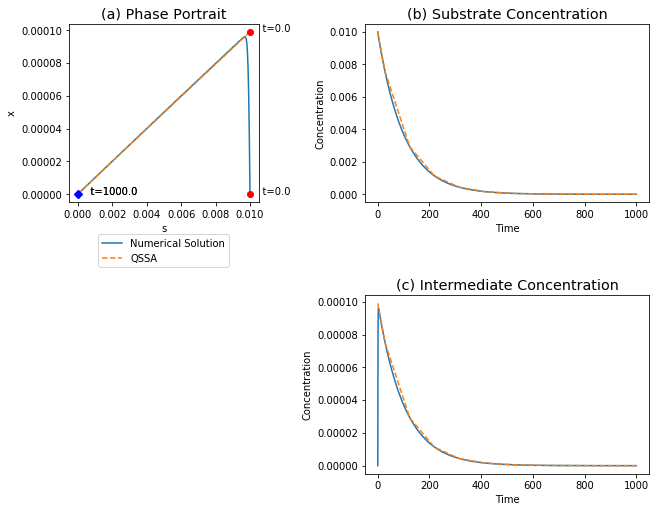

In [7]:
fig_5_5 = plt.figure(constrained_layout=True, figsize=(9, 7))
gs = fig_5_5.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1.5],
                          height_ratios=[1, 1])

ax1 = fig_5_5.add_subplot(gs[0, 0])
ax2 = fig_5_5.add_subplot(gs[0, 1])
ax3 = fig_5_5.add_subplot(gs[1, 1])
# Phase portrait of both solutions' substrate vs. intermediate
plot_phase_portrait(
    conc_sol, x=s, y=x, ax=ax1, legend=["Numerical Solution"],
    annotate_time_points="endpoints",
    annotate_time_points_color=["r", "b"],
    annotate_time_points_labels=True);
plot_phase_portrait(
    qssa_sol, x=s, y=x, ax=ax1, legend=["QSSA", "lower outside"], 
    xlabel=s.id, ylabel=x.id, linestyle=["--"],
    title=("(a) Phase Portrait", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

# Time profile of solutions' substrate concentration
plot_time_profile(conc_sol, observable=s, ax=ax2);
plot_time_profile(qssa_sol, observable=s, ax=ax2, 
                xlabel="Time", ylabel="Concentration",
                title=("(b) Substrate Concentration", {"size": "x-large"}),
                linestyle=["--"]);
# Time profile of solutions' intermediate concentration
plot_time_profile(conc_sol, observable=x, ax=ax3);
plot_time_profile(qssa_sol, observable=x, ax=ax3,
                xlabel="Time", ylabel="Concentration",
                title=("(c) Intermediate Concentration", {"size": "x-large"}),
                linestyle=["--"]);

*__Figure 5.5:__ The transient response of the Michaelis-Menten reaction mechanism, for \\(k_2 = k_{-1},\ 100e_0 = K_m \ \text{and} \ s_0 = K_m\\). (a) The phase portrait . (b) The substrate concentrations. (c) The slow transients. The solid and dashed line represent the quasi-steady state and the full numerical solution respectively.*

### Comment on the criterion \\(e_0 << s_0\\)
Historically, the commonly accepted criterion for the applicability of the quasi-steady state assumption is that the initial concentration of the enzyme must be much smaller than that of the substrate. The actual criterion is \\(e_0 << K_m, \ \text{or} \ b << 1\\) (Palsson, 1984). Figure 5.5 shows the reaction dynamics for \\(e_0 = K_m, \ e_0 = 100s_0, \ 100k_2 = k_{-1}\\), which is analogous to Figure 5.4, except the initial substrate concentration is now a hundred times smaller than \\(K_m\\). In other words, we have \\(e_0 = s_0 << K_m\\) and, as demonstrated in Figure 5.5, the quasi-steady state assumption is applicable. 

## 5.4 Hill-kinetics for Enzyme Regulation
### Regulated enzymes
Enzyme activity is regulated by the binding of small molecules to the enzyme resulting in an altered enzymatic activity. Such binding can inhibit or activate the catalytic activities of the enzyme. The regulation of enzymes such regulators represents a 'tug of war' between the functional states of the enzyme, see Figure 5.6. A simple extension of the oldest reaction mechanisms for ligand binding to oligomeric protein, i.e., oxygen binding to hemoglobin, is commonly used to obtain simple rate laws for regulated enzymes (Hill, 1910).

![Figure-5-6](./images/Ch5/Figure-5-6.png)

*__Figure 5.6:__ An example of a regulated multimeric enzyme. The T form of the enzyme created by inhibitor binding is inactive, where as the R form, where no inhibitor is bound, is catalytically active. From (Koolman, 2005) (reprinted with permission).*

### The reaction mechanism  
The Hill reaction mechanism is based on two reactions: a catalytic conversion and the sequestration of the enzyme in an inactive form. It assumes that the catalyzed reaction is an irreversible bi-molecular reaction between the substrate, \\(S\\), and the enzyme, \\(E\\), to form the product,\\(P\\), and the free enzyme in a single elementary reaction: 

$$\begin{equation} S + E \stackrel{k}{\rightarrow} E + P \tag{5.14} \end{equation}$$

The enzyme in turn can be put into a catalytically inactive state, \\(X\\), through binding simultaneously and reversibly to $\nu$ molecules of an inhibitor, \\(I\\): 

$$\begin{equation} E + {\nu}I \underset{k_{-i}^-}{\stackrel{k_{i}^+}{\rightleftharpoons}} X \tag{5.15} \end{equation}$$

Numerical values for \\(\nu\\) often exceed unity. Thus, the regulatory action of \\(I\\) is said to be lumped in the simple \\(E\\) to \\(X\\) transformation, as values of $\nu$ greater than 1 are chemically unrealistic. Numerical values estimated from data show that the best fit values for \\(\nu\\) are not integers; for instance \\(\nu\\) is found to be around 2.3 to 2.6 for \\(O_2\\) binding to hemoglobin. Section 5.5 describes more realistic reaction mechanisms of serial binding of an inhibitor to a regulated enzyme to sequester it in an inactive form. 

### Step 1: Dynamic mass balances  
The mass action kinetic equations are 

$$\begin{equation*} \frac{ds}{dt} = -v_1, \ \frac{de}{dt} = -v_2 + v_3, \ \frac{dp}{dt} = v_1, \ \frac{di}{dt} = -\nu (v_2 - v_3), \ \frac{ds}{dt} = v_2 - v_3 \end{equation*}$$

where the reaction rates are 

$$\begin{equation} v_1 = kse, \ v_2 = k_i^+i^{\nu}e, \ v_3 = k_i^-x \tag{5.16} \end{equation}$$

### Step 2: Finding the time invariants  
We define \\(\textbf{x} = (s, e, p, i, x) \ \text{and} \ \textbf{v} = (ks, k_i^+i^{\nu}e, k_i^-x)\\). The stoichiometric matrix is then 

$$\begin{equation} \textbf{S} = \begin{pmatrix} {-1} & {0} & {0} \\ {0} & {-1} & {1} \\ {1} & {0} & {0} \\ {0} & {-\nu} & {\nu} \\ {0} & {1} & {-1} \\ \end{pmatrix} \tag{5.17} \end{equation}$$

and has a rank of two. The conservation quantities are a balance on the substrate, the enzyme, and the inhibitor: 

$$\begin{equation} s_0 = s + p, \ e_0 = e + x, \ i_0 = i + \nu x \tag{5.18} \end{equation}$$

### Step 3: Reducing the dynamic description  
We need two differential equations to simulate the dynamic response and then the remaining three variables can be computed from the conservation relationships. We can choose the substrate, \\(s\\), and the concentration of the enzyme, \\(e\\): 

$$\begin{equation} \frac{ds}{dt} = kse, \ \frac{de}{dt} = -k_i^+i^{\nu}e + k_i^-x \tag{5.19} \end{equation}$$

then \\(p\\), \\(x\\) and \\(i\\) are computed from Eq. (5.18). 

### Step 4: Applying simplifying kinetic assumptions  

If we assume that the binding of the inhibitor is fast, so that a quasi-equilibrium  forms for the reaction of Eq. (5.15), we have 

$$\begin{equation} v_2 = v_3, \ \text{thus} \ x = (k_i^+/k_i^-)i^{\nu}e = (i/K_i)^{\nu}e, \ \text{and} \ \frac{de}{dt} = \frac{dx}{dt} = \frac{di}{dt} = 0 \tag{5.20} \end{equation}$$

where \\(K_i\\) is a "per-site" dissociation constant for Eq. (5.15). The enzyme is in one of two states, so that we have the mass balance 

$$\begin{equation} e_0 = e + x = (1 + (i/K_i)^{\nu})e \ \text{or} \ e(i) = \frac{e_0}{1 + (i/K_i)^{\nu}} \tag{5.21} \end{equation}$$

where \\(e_0\\) is the total concentration of the enzyme. Using the mass balance and the quasi-equilibrium assumption gives the flux through the regulated reaction as 

$$\begin{equation} v(i) = ke(i)s = \frac{ke_0s}{1 + (i/K_i)^{\nu}} = \frac{v_m}{1 + (i/K_i)^{\nu}} \tag{5.22} \end{equation}$$

with \\(v_m = ke_0s\\). The Hill model has three parameters: 1) \\(\nu\\), the degree of cooperativity,  2) \\(K_i\\), the dissociation constant for the inhibitor and, 3) \\(v_m\\), the maximum reaction rate or the capacity of the enzyme. We note that 

$$\begin{equation} f_e = \frac{e(i)}{e_0} = \frac{1}{1 + (i/K_i)^{\nu}} \tag{5.23} \end{equation}$$

represents the fraction of the enzyme that is in the active state. Note that \\(f_e \lt 1\\) for any finite concentration of the inhibitor. 

##### Hill-Kinetics Solution

In [8]:
t0 = 0
tf = 10

def hill(t, state_vars, *params):
    s, p, e, i, x = state_vars 
    k1, k_plus,k_minus, nu = params
    # Reaction Rates
    v1 = k1 * s * e
    v2 = k_plus * i**nu * e
    v3 = k_minus * x
    # Differential equations
    diffeqs =[-v1,          # ds/dt
              v1,           # dp/dt
              -v2 + v3,     # de/dt
              -nu*(v2 - v3), # di/dt
              v2 - v3]      # dx/dt
    return diffeqs

# Define initial conditions
s0, p0, e0, i0, x0 = (1, 0, 1, 1, 0)

# Define paramters
k1 = 1
k_plus, k_minus = (100, 100)
nu = 2
params = [k1, k_plus, k_minus, nu]

# Obtain numerical solutions
sol_obj = solve_ivp(fun=lambda t, state_vars: hill(t, state_vars, *params),
                    t_span=(t0, tf), y0=[s0, p0, e0, i0, x0])
# Store solutions into Solution Objects
sol_dict = dict(zip(["s", "p", "e", "i", "x"], sol_obj.y))
hill_sol = MassSolution(
    "Hill", solution_type="Conc", data_dict=sol_dict,
    time=sol_obj.t, interpolate=False)

##### Visualization of Solution

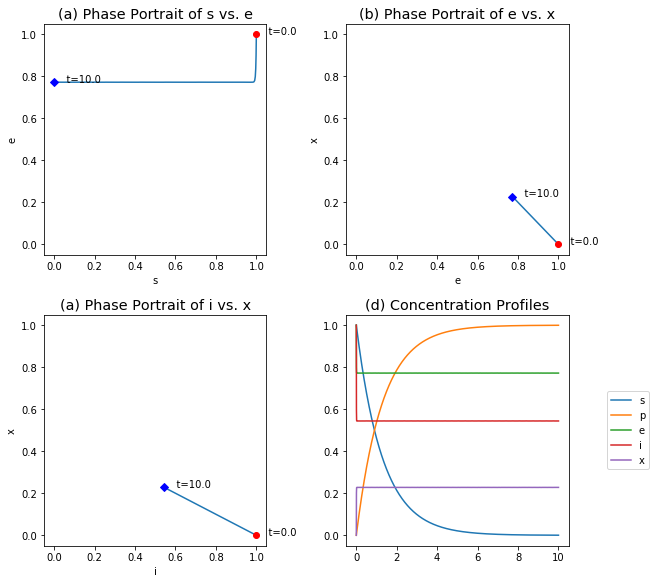

In [9]:
fig_5_7 = plt.figure(constrained_layout=True, figsize=(9, 8))
gs = fig_5_7.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1],
                          height_ratios=[1, 1])

ax1 = fig_5_7.add_subplot(gs[0, 0])
ax2 = fig_5_7.add_subplot(gs[0, 1])
ax3 = fig_5_7.add_subplot(gs[1, 0])
ax4 = fig_5_7.add_subplot(gs[1, 1])

plot_phase_portrait(
    hill_sol, x="s", y="e", ax=ax1, xlabel="s", ylabel="e",
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(a) Phase Portrait of s vs. e", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);
plot_phase_portrait(
    hill_sol, x="e", y="x", ax=ax2, xlabel="e", ylabel="x",
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(b) Phase Portrait of e vs. x", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

plot_phase_portrait(
    hill_sol, x="i", y="x", ax=ax3, xlabel="i", ylabel="x",
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(a) Phase Portrait of i vs. x", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);
plot_time_profile(
    hill_sol, ax=ax4, legend="right outside", 
    title=("(d) Concentration Profiles", {"size": "x-large"}));

*__Figure 5.7:__ The transient response of the Hill reaction mechanism, for \\(k_i^+ = k_i^- = 100\\), \\(k = 1\\), \\(\nu = 2\\), \\(x_0 = 0\\) and \\(e_0 = s_0 = i_0 = 1\\). (a) The phase portraits of \\(s\\) and \\(e\\). (b) The phase portraits of \\(e\\) and \\(x\\). (c) The phase portraits of \\(i\\) and \\(x\\). (d) The concentration profiles.*

### Step 5: Numerical solutions  
The dynamic response of the Hill reaction mechanism is shown in Figure 5.7. The trace in the \\(s\\) vs. \\(e\\) phase portrait is L-shaped, showing a rapid initial equilibration of the enzyme to the inhibitor (the vertical line), followed by the slower conversion of the product (the horizontal line). These two reactions are naturally (stoichiometrically) decoupled and separated in time for the numerical values of the kinetic constants used. 

The phase portraits for \\(e\\) vs. \\(x\\) and \\(i\\) vs. \\(x\\) are straight lines as given by the conservation Eq. (5.18), see Figure 5.7b,c. The two phase transient responses in Figure 5.7d shows the rapid equilibration of the enzyme and the slow conversion of substrate. Under these parameter conditions, the QEA should give good results. 

### Step 6: Estimating key parameters  
There are two features of the Hill rate law that are of interest: 

#### 1) Applicability of the quasi-equilibrium assumption.  
Given the fact that the two reactions have characteristic times scales, their relative magnitude is of key concern when it comes to the justification of the QEA: 

$$\begin{equation} a = (\frac{\text{characteristic binding time of the inhibitor}}{\text{characteristic turnover time of the substrate}}) = \frac{k}{k_i^+} \tag{5.24} \end{equation}$$

If \\(a\\) is much smaller than unity, we would expect the QEA to be valid. In Figure 5.7, \\(a\\) is 0.01. 

#### 2) Regulatory characteristics  
The Hill rate law has a sigmoidal shape with sensitivity of the reaction rate to the end product concentration as 

$$\begin{equation} v_i = \frac{\partial v}{\partial i} = \frac{-\nu v_m}{i} \frac{(i/K_i)^{\nu}}{[1 + (i/K_i)^{\nu}]^2} \tag{5.25} \end{equation}$$

which has a maximum 

$$\begin{equation} v_i^* = -\frac{v_m}{K_i}N(\nu) \ \text{where} \ N(\nu) = \frac{1}{4\nu}(\nu - 1)^{1 - 1/\nu}(\nu + 1)^{1 + 1/\nu} \tag{5.26} \end{equation}$$

at the inflection point 

$$\begin{equation} i^* = K_i(\frac{\nu - 1}{\nu + 1})^{1/\nu} \tag{5.27} \end{equation}$$

For plausible values of \\(\nu\\), the function \\(N(\nu)\\) is on the order of unity (Table 5.1), and hence the maximum sensitivity \\(v_i^*\\) is on the order of \\((-v_m/K_i)\\). The ratio \\((K_i/v_m)\\) can be interpreted as a time constant characterizing the inhibition process; 

$$\begin{equation} t_i = \frac{K_i}{v_m} = [\frac{\text{concentration}}{\text{concentration/time}}]\tag{5.28} \end{equation}$$

This estimate represents an upper bound since the steady state concentration of $i$ can be different from \\(i^*\\). The turnover of the substrate happens on a time scale defined by the rate constant \\(t_s = 1/k\\). Thus, a key dimensionless property is 

$$\begin{equation} b = \frac{t_s}{t_i} = \frac{1/k}{K_i/v_m} = \frac{v_m}{kK_i} = \frac{e_t}{K_i} \tag{5.29} \end{equation}$$

Therefore, the dimensionless parameter $b$ can be interpreted as a ratio of time constants or as a ratio of concentration ranges. 

*__Table 5.1:__ The values of the function \\(N(\nu)\\) and \\(i^*/K_i\\) at the inflection point.*

In [10]:
def N(nu): # N(v)
    return (1/(4*nu))*((nu-1)**(1-1/nu))*((nu+1)**(1+1/nu))

def i_Ki(nu): # i*/Ki
    return ((nu-1)/(nu+1))**(1/nu)

cols = [nu for nu in np.linspace(2, 5, 4)]
tab_5_1 = pd.DataFrame([[round(N(nu), 2) for nu in cols], 
                        [round(i_Ki(nu), 2) for nu in cols]],
                      index=['N($\\nu$)', '\\(i^{*}\\)\\(/K_{i}\\)'], columns=cols)
tab_5_1.index.rename('$\\nu$', inplace=True)
tab_5_1

,2.0,3.0,4.0,5.0
$\nu$,,,,
N($\nu$),0.65,0.84,1.07,1.30
\(i^{*}\)\(/K_{i}\),0.58,0.79,0.88,0.92


## 5.5 The Symmetry Model
The regulatory molecules are often chemically quite different than the substrate molecule. They thus often have a different binding site on the protein molecule than the catalytic site. It called an _allosteric site_. One of the earliest enzyme kinetic models that accounted for allosterism was the symmetry model (Monod, 1965), named after certain assumed symmetry properties of the subunits of the enzyme. It is a mechanistically realistic description of regulatory enzymes. An example of a multimeric regulatory enzyme is given in Figure 5.6.

### The reaction mechanism  
The main chemical conversion in the symmetry model is as before and is described by Equation (5.14). The symmetry model postulates that the regulated enzyme lies naturally in two forms, \\(E\\) and \\(X\\), and is converted between the two states simply as 

$$\begin{equation} E \underset{k_{-}}{\stackrel{k_+}{\rightleftharpoons}} X  \tag{5.30} \end{equation}$$

The equilibrium constant for this reaction, 

$$\begin{equation} L = k_+/k_- = x/e \tag{5.31} \end{equation}$$

has a special name, the allosteric constant. Then \\(\nu\\) molecules of an inhibitor, \\(I\\), can bind sequentially to \\(X\\) as 

$$\begin{equation} \begin{matrix} {X} & {+} & {I} & {\underset{k_i^-}{\stackrel{\nu k_i^+}{\rightleftharpoons}}} & {X_1} \\ {X_1} & {+} & {I} & {\underset{2 k_i^-}{\stackrel{(\nu-1) k_i^+}{\rightleftharpoons}}} & {X_2} \\ {\vdots} & {} & {} & {} & {\vdots} \\ {X_{\nu - 1}} & {+} & {I} & {\underset{\nu k_i^-}{\stackrel{k_i^+}{\rightleftharpoons}}} & {X_{\nu}} \\ \end{matrix} \tag{5.32} \end{equation}$$

where the binding steps have the same dissociation constant, \\(K_i = k_i^- / k_i^+\\). We will discuss the most common case of a tetramer here, i.e., \\(\nu = 4\\), see Figure 5.8.

![Figure-5-8](./images/Ch5/Figure-5-8.png)

*__Figure 5.8:__ The reaction mechanisms for the symmetry model. The enzyme has four binding sites for the inhibitor.*

### Step 1: Dynamic mass balances  
The conversion rate of the substrate is 

$$\begin{equation} v = kse \tag{5.33} \end{equation}$$

whereas the enzyme sequestration is characterized by the reaction rates 

$$\begin{equation} \begin{matrix} {v_1 = k^+e,} & {v_2 = k^-x,} & {v_3 = 4k_i^+xi,} \\ {v_4 = k_i^-x_1,} & {v_5 = 3 k_i^+x_1i,} & {v_6 = 2k_i^-x_2,} \\ {v_7 = k_i^+x_2i,} & {v_8 = k_i^-x_3,} & {v_9 = k_i^+x_3i,} \\ {} & {v_{10} = 4k_i^-x_4} & {} \\ \end{matrix} \tag{5.34} \end{equation}$$

The dynamic mass balances on the various states of the enzyme are: 

$$\begin{align}\frac{de}{dt} &= -v_1 + v_2\\ \frac{dx}{dt}   &= v_1 - v_2 - v_3 + v_4\\ \frac{di}{dt}   &= -v_3 + v_4 - v_5 + v_6 - v_7 + v_8 - v_9 + v_{10} \\ \frac{dx_1}{dt} &= v_3 - v_4 - v_5 + v_6 \\ \frac{dx_2}{dt} &= v_5 - v_6 - v_7 + v_8 \\ \frac{dx_3}{dt} &= v_7 - v_8 - v_9 + v_{10} \\ \frac{dx_4}{dt} &= v_9 - v_{10} \\ \end{align} \tag{5.35}$$

### Step 2: Finding the time invariants  
The stoichiometric matrix for \\(\textbf{x} = (e, x, i, x_1, x_2, x_3, x_4)\\) is a 7x10 matrix:

$$\begin{equation} \textbf{S} = \begin{pmatrix} {-1} & {1} & {0} & {0} & {0} & {0} & {0} & {0} & {0} & {0} \\ {1} & {-1} & {-1} & {1} & {0} & {0} & {0} & {0} & {0} & {0} \\ {0} & {0} & {-1} & {1} & {-1} & {1} & {-1} & {1} & {-1} & {1} \\ {0} & {0} & {1} & {-1} & {-1} & {1} & {0} & {0} & {0} & {0} \\ {0} & {0} & {0} & {0} & {1} & {-1} & {-1} & {1} & {0} & {0} \\ {0} & {0} & {0} & {0} & {0} & {0} & {1} & {-1} & {-1} & {1} \\ {0} & {0} & {0} & {0} & {0} & {0} & {0} & {0} & {1} & {-1} \\ \end{pmatrix} \tag{5.36} \end{equation}$$

that has a rank of 5. Thus, there are two conservation relationships, for the enzyme: \\(e_0 = e + x + x_1 + x_2 + x_3 + x_4\\);, and, for the inhibitor: \\(i_0 = i + x_1 + 2x_2 + 3x_3 + 4x_4\\). If the dynamic mass balances on the substrate and product are taken into account, a third conservation \\(s_0 = s + p\\) appears. 

## Step 3: Reducing the dynamic description  
We leave it to the reader to pick two dynamic variables from the full kinetic model as the dependent variables and then eliminate them from the dynamic description using the conservation relationships. The impetus for doing so algebraically becomes smaller as the number of differential equations grows. Most standard software packages will integrate a dynamically redundant set of differential equations and such substitution is not necessary to obtain the numerical solutions. 

### Step 4: Using simplifying kinetic assumptions to derive a rate law  
The serial binding of an inhibitor to X that has four binding sites is shown in Figure 5.8. The derivation of the rate law is comprised of four basic steps: 

1. Mass balance on enzyme: 

$$\begin{equation} e_0 = e + x + x_1 + x_2 + x_3 + x_4 \tag{5.37} \end{equation}$$

2. QEA for binding steps: 

$$\begin{align} 4k_i^+ix   =  k_i^-x_1 \ &\Rightarrow \ x_1 = \frac{4}{1}x  (i/K_i) = 4x(i/K_i) \\ 3k_i^+ix_1 = 2k_i^-x_2 \ &\Rightarrow \ x_2 = \frac{3}{2}x_1(i/K_i) = 6x(i/K_i)^2 \\ 2k_i^+ix_2 = 3k_i^-x_3 \ &\Rightarrow \ x_3 = \frac{2}{3}x_2(i/K_i) = 4x(i/K_i)^3 \\ k_i^+ix_3 = 4k_i^-x_4 \ &\Rightarrow \ x_4 = \frac{1}{4}x_3(i/K_i) =  x(i/K_i)^4 \\ \end{align} \tag{5.38}$$

3. Combine 1 and 2: 

$$\begin{align} e_0 &= e + x + 4x(i/K_i) + 6x(i/K_i)^2 + 4x(i/K_i)^3 + x(i/K_i)^4 \\ &= e + x(1 + (i/K_i))^4 \ \text{where} \ x=Le \\ &= e(1 + L(1 + (i/K_i)))^4  \end{align} \tag{5.39}$$

4. Form the rate law: The reaction rate is given by: $v = kse$. We can rewrite the last part of Eq. (5.39) as: 

$$\begin{equation} e = \frac{e_0}{1 + L(1 + i/K_i)^4} \tag{5.40} \end{equation}$$

leading to the rate law: 

$$\begin{equation} v(s, i)  = \frac{ke_0s}{1 + L(1 + i/K_i)^4} \tag{5.41} \end{equation}$$

This rate law generalizes to: 

$$\begin{equation} v(s, i)  = \frac{ke_0s}{1 + L(1 + i/K_i)^{\nu}} = \frac{v_m}{1 + L(1 + i/K_i)^{\nu}} \tag{5.42} \end{equation}$$

for any \\(\nu\\). The reader can find the same key dimensionless groups as for the Hill rate law. Note again the fraction 

$$\begin{equation} f_e = \frac{e}{e_0} = \frac{1}{1 + L(1 + i/K_i)^{\nu}} \tag{5.43} \end{equation}$$

that describes the what fraction of the enzyme is in the catalytically active state. 

##### Symmetry Model Solution

In [11]:
t0 = 0
tf = 15

def symmetry(t, state_vars, *params):
    s, p, e, i, x, x1, x2, x3, x4 = state_vars
    k1, k_plus, k_minus, ki_plus, ki_minus = params
    # Enzyme Reaction Rates
    v1 = k_plus * e;           v2 = k_minus * x;
    v3 = 4 * ki_plus * i * x;  v4 = ki_minus * x1;
    v5 = 3 * ki_plus * i * x1; v6 = 2 * ki_minus * x2;
    v7 = 2 * ki_plus * i * x2; v8 = 3 * ki_minus * x3;
    v9 = ki_plus * i * x3;    v10 = 4 * ki_minus * x4;
    # Differential equations to integrate
    diffeqs = [-k1 * s * e,                             #  ds/dt
               k1 * s * e,                              #  dp/dt
               -v1 + v2,                                #  de/dt
               -v3 + v4 - v5 + v6 - v7 + v8 - v9 + v10, #  di/dt
               v1 - v2 - v3 + v4,                       #  dx/dt
               v3 - v4 - v5 + v6,                       # dx1/dt
               v5 - v6 - v7 + v8,                       # dx2/dt
               v7 - v8 - v9 + v10,                      # dx3/dt
               v9 - v10]                                # dx4/dt
    return diffeqs

# Define initial conditions
s0, p0, e0, i0, x0 = (1, 0, 1, 1, 0)
x1_0, x2_0, x3_0, x4_0 = (0, 0, 0, 0)

# Define paramters
k1 = 1; 
k_plus, k_minus = (100, 100)
ki_plus, ki_minus = (2, 2)
params = [k1, k_plus,k_minus, ki_plus, ki_minus]

# Obtain numerical solutions
sol_obj = solve_ivp(fun=lambda t, state_vars: symmetry(t, state_vars, *params),
                    t_span=(t0, tf), y0=[s0, p0, e0, i0, x0, x1_0, x2_0, x3_0, x4_0])
# Store solutions into Solution Objects
sol_dict = dict(zip(["s", "p", "e", "i", "x", "x1", "x2", "x3", "x4"], sol_obj.y))

x_total = sum(sol_dict[k] for k in ["x", "x1", "x2", "x3", "x4"])
i_bound = sum(i*sol_dict[k] for i, k in zip([1, 2, 3, 4], ["x1", "x2", "x3", "x4"]))

sol_dict.update({"x_total": x_total, "i_bound": i_bound})

symmetry_sol = MassSolution(
    "Symmetry", solution_type="Conc", data_dict=sol_dict,
    time=sol_obj.t, interpolate=False)

##### Visualization of solution

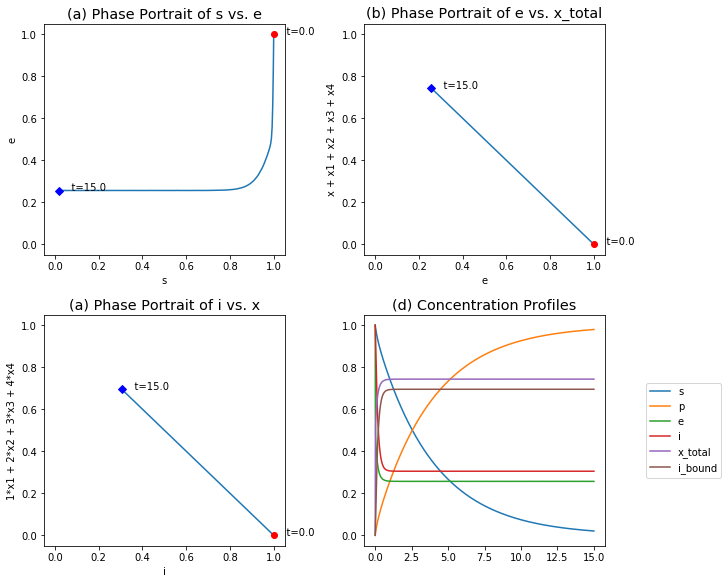

In [12]:
fig_5_9 = plt.figure(constrained_layout=True, figsize=(10, 8))
gs = fig_5_9.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 1],
                          height_ratios=[1, 1])

ax1 = fig_5_9.add_subplot(gs[0, 0])
ax2 = fig_5_9.add_subplot(gs[0, 1])
ax3 = fig_5_9.add_subplot(gs[1, 0])
ax4 = fig_5_9.add_subplot(gs[1, 1])

plot_phase_portrait(
    symmetry_sol, x="s", y="e", ax=ax1, xlabel="s", ylabel="e",
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(a) Phase Portrait of s vs. e", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

plot_phase_portrait(
    symmetry_sol, x="e", y="x_total", ax=ax2, 
    xlabel="e", ylabel='x + x1 + x2 + x3 + x4',
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(b) Phase Portrait of e vs. x_total", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

plot_phase_portrait(
    symmetry_sol, x="i", y="i_bound", ax=ax3, 
    xlabel="i", ylabel='1*x1 + 2*x2 + 3*x3 + 4*x4',
    xlim=(-0.05, 1.05), ylim=(-0.05, 1.05),
    title=("(a) Phase Portrait of i vs. x", {"size": "x-large"}),
    annotate_time_points="endpoints",
    annotate_time_points_labels=True);

plot_time_profile(
    symmetry_sol, observable=list(
        k for k in symmetry_sol.keys() if k not in [
            "x", "x1", "x2", "x3", "x4"]),
    ax=ax4, legend="right outside",
    title=("(d) Concentration Profiles", {"size": "x-large"}));

*__Figure 5.9:__  The transient response of the symmetry model, for \\(k^+ = k^- = 100\\), \\(k_i^+ = k_i^- = 2\\), \\(k = 1\\), \\(\nu = 4\\), \\(x_0 = x_{1, 0} = x_{2, 0} = x_{3, 0} = x_{4, 0} = 0\\) and \\(e_0 = s_0 = i_0 = 1\\). (a) The phase portraits of \\(s\\) and \\(e\\). (b) The phase portraits of \\(e\\) and \\((x + x_1 + x_2 + x_3 + x_4)\\). (c) The phase portraits of \\(i\\) and \\((x_1 + 2x_2 + 3x_3 + 4x_4)\\). (d) Concentration and pool profiles.*

### Step 5: Numerical solutions  
These equations can be simulated. Typically the conformational changes between \\(E\\) and \\(X\\) are fast as are the inhibitor binding steps relative to the catalysis rate. Numerical simulations were carried out for this situation and the results are plotted in Figure 5.9. 

* Figure 5.9a shows how the substrate-enzyme phase portrait is L-shaped showing that the sequestration of the enzyme in the inhibited form (the vertical line) is faster than the conversion of the substrate (the horizontal line). 

* Figure 5.9b shows the redistribution of the total enzyme among the active and inactive forms, that is, \\(e\\) vs. \\((x + x_1 + x_2 + x_3 + x_4)\\). The fraction of the enzyme in the inactive form is about 0.29. 

* Figure 5.9c shows the redistribution of the inhibitor between the free and bound form; \\(i\\) vs. \\((x_1 + 2x_2 + 3x_3 + 4x_4)\\). This panel shows that the fraction the inhibitor that is bound is high, 0.70. 

* Finally, Figure 5.9d show the transient changes in the concentrations and pools on the fast and slow time scales. Note that two natural aggregation variables appear: the total enzyme in the inactive form, and the total number of inhibitor molecules bound to the enzyme. 

## 5.6 Scaling Dynamic Descriptions  
The analysis of simple equations requires the "proper frame of mind." In step 6 of the process of formulating rate laws, this notion is translated into quantitative measures. We need to scale the variables with respect to intrinsic reference scales and thereby cast our mathematical descriptions into appropriate coordinate systems. All parameters then aggregate into dimensionless property ratios that, if properly interpreted, have a clear physical significance. 

### The scaling process: 
The examples above illustrate the decisive role of time constants and their use to analyze simple situations and to elucidate intrinsic reference scales. Identification of unimportant terms is sometimes more difficult and familiarity with a formal scaling procedure is useful. This procedure basically consists of four steps: 

1. Identify logical reference scales. This step is perhaps the most difficult. It relies partly on physical intuition, and the use of time constants is surprisingly powerful even when analyzing steady situations. 

2. Introduce reference scales into the equations and make the variables dimensionless. 

3. Collect the parameters into dimensionless property ratios. The number of dimensionless parameters is always the same and it is given by the well-known Buckingham Pi theorem. 
    
4. Interpret the results. The dimensionless groups that appear can normally be interpreted as ratios of the time constants, such as those discussed above. 

Scaling of equations is typically only practiced for small models and for analysis purposes only. Numerical simulations of complex models are essentially always performed with absolute values of the variables. 

### The importance of intrinsic reference scales  
The process by which the equations are made dimensionless is not unique. The 'correct' way of putting the equations into a dimensionless form, where judgments of relative orders of magnitude can be made, is called _scaling_. The scaling process is defined by Lin and Segel (Segel, 1974) as: 

"...select intrinsic reference quantities so that each term in the dimensional equations transforms into a product of a constant dimensional factor which closely estimates the term's order of magnitude and a dimensionless factor of unit order of magnitude."

In other words, if one has an equation which is a sum of terms \\(T_i\\) as: 

$$\begin{equation} T_1 + T_2 + \dots = 0 \tag{5.44} \end{equation}$$

one tries to scale the _variables_ involved so that they are of unit order of magnitude or 

$$\begin{equation} t_i = \frac{\text{variable}_i}{\text{intrinistic reference scale}_i} \approx \text{unit order of magnitude} \tag{5.45} \end{equation}$$

Introducing these dimensionless variables into equation (5.44)  results in the dimensionless form: 

$$\begin{equation} \pi_1 t_1 + \pi_2 t_2 + \dots = 0 \tag{5.44} \end{equation}$$

where the dimensionless multipliers, \\(\pi_i\\) are the dimensionless groups and they will indicate the order of magnitude of the product, \\(\pi_it_i\\). Once the equations are in this form, order of magnitude judgements can be made based on the dimensionless groups. 

## 5.7 Summary   

* Enzymes are highly specialized catalysts that can dramatically accelerate the rates of biochemical reactions. 


* Reaction mechanisms are formulated for the chemical conversions carried out by enzymes in terms of elementary reactions. 


* Rate laws for enzyme reaction mechanisms are derived based on simplifying assumptions. 


* Two simplifying assumptions are commonly used: the quasi-steady state (QSSA) and the quasi-equilibrium assumptions (QEA). 


* The validity of the simplifying assumptions can be determined using scaling of the equations followed by mathematical and numerical analysis. 


* A number of rate laws have been developed for enzyme catalysis and for the regulation of enzymes. Only three reaction mechanisms were described in this chapter. 

\\(\tiny{\text{© B. Ø. Palsson 2011;} \
\text{This publication is in copyright.}\\ 
\text{Subject to statutory exception and to the provisions of relevant collective licensing agreements,}\\ \text{no reproduction of any part may take place without the written permission of Cambridge University Press.}}\\)